Firefly Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

# Importing Library

rapihkan code setiap code di tambahkan time stamp di setiap cell di code code lain

tambahkan best fitting nanti di code gen berikut 

setiap output akan ngeprint gamma beta dan alpha nya juga dari sekarang

In [14]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm
from termcolor import colored
from IPython.display import display, HTML
from datetime import datetime
import time

# Fungsi F14

In [15]:
# Mulai menghitung waktu
start_time = time.perf_counter()

def F14(x):
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    x = x.reshape(2, 1)
    bS = np.sum((x - aS) ** 6, axis=0)
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS))) ** -1

# Selesai menghitung waktu
finish_time = time.perf_counter()

# Cetak hasil
print(colored("Proses selesai","green"))
print(colored(f"Waktu proses: {(finish_time - start_time) * 1000:.4f} milliseconds", "yellow"))


Proses selesai
Waktu proses: 0.2347 milliseconds


# Parameter 

In [16]:
# Parameter Firefly Algorithm
n = 100  # Jumlah kunang-kunang dalam 1 populasi
max_iter = 100 # Jumlah iterasi
lb, ub = -50, 100  # Batas bawah dan atas untuk posisi firefly
plot_lb, plot_ub = -100, 100  # Batas bawah dan atas untuk plot gambar

# Randomly generate alpha, gamma, beta_init 
alpha = np.random.uniform(0.1, 1)  # Example range for alpha
gamma = np.random.uniform(0.1, 1)  # Example range for gamma
beta_init = np.random.uniform(0.1, 1)  # Example range for beta_init

print("Random chossen value\n")
print(f"Alpha: {alpha},\n"
      f"Gama: {gamma}, \n"
      f"Beta: {beta_init}")

display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))

Random chossen value

Alpha: 0.28299426880879214,
Gama: 0.5330439816691515, 
Beta: 0.84283814169816


# Inisialisasi Populasi

In [17]:
#np.random.seed(42) # Memastikan bilangan acak dapat di replikasi
positions = np.random.uniform(lb, ub, (n, 2)) # Menghasilkan array n*2 dengan range lb, ub
fitness = np.array([F14(firefly) for firefly in positions])

display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))

# Algoritma Firefly

In [18]:
# Simpan data untuk animasi
history = []
# Track the best solution found
best_position = None
best_fitness = np.inf

display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))

In [19]:
def distance(x, y):
    return np.linalg.norm(x - y)

def firefly_algorithm():
    global positions, fitness, history, best_position, best_fitness
    for t in tqdm(range(max_iter), desc="Progress", colour="green"):
        history.append(positions.copy())
        for i in range(n):
            for j in range(n):
                if fitness[j] < fitness[i]:
                    r = distance(positions[i], positions[j])
                    beta = beta_init * np.exp(-gamma * r)
                    
                    new_position = positions[i] + beta * (positions[j] - positions[i]) + alpha * (np.random.rand(2) - 0.5)
                    
                    new_position = np.clip(new_position, lb, ub)
                    new_fitness = F14(new_position)
                    
                    if new_fitness < fitness[i]:
                        positions[i] = new_position
                        fitness[i] = new_fitness
                        best_fitness = new_fitness
                        best_position = new_position.copy() 
                        
                        # if new_fitness < best_fitness:
                        #     best_fitness = new_fitness
                        #     best_position = new_position.copy()   
    return positions

display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))

In [20]:
# Jalankan algoritma Firefly
positions = firefly_algorithm()
history.append(positions.copy())

print(f"BEST RECORDING {best_position} with fitness {best_fitness}")
print(colored("STOPPING RECORDING", "red"))
display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))

Progress: 100%|██████████| 100/100 [00:17<00:00,  5.78it/s]


BEST RECORDING [-15.95509877  31.92194055] with fitness 21.07268750936205
STOPPING RECORDING


# Visualisasi Plot hasil dan animasi

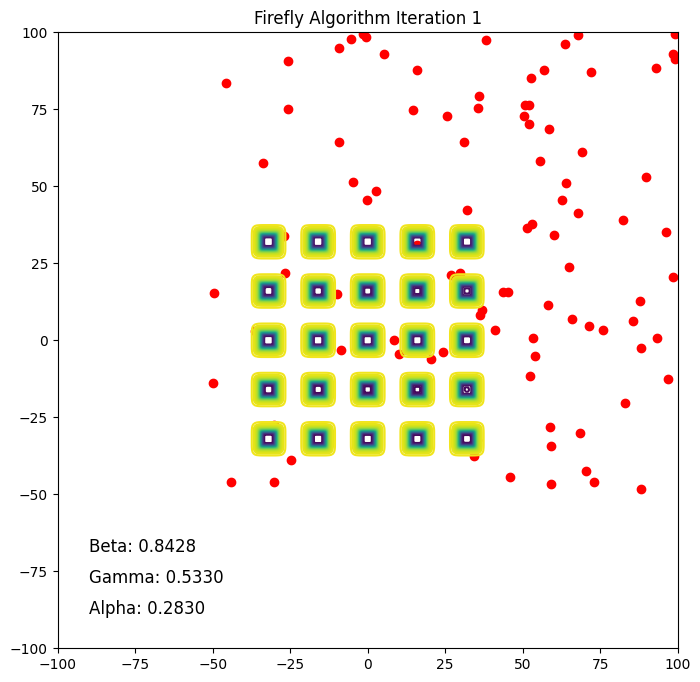

In [21]:
# Prepare contour plot data
X1 = np.linspace(plot_lb, plot_ub, 400)
X2 = np.linspace(plot_lb, plot_ub, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F14(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Set up the plot and axes for animation
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figsize for a square plot
ax.set_xlim(plot_lb, plot_ub)
ax.set_ylim(plot_lb, plot_ub)
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter([], [], c='red')  # Solution candidates

# Add text annotations for alpha, gamma, and beta_init inside the plot
text_alpha = ax.text(0.05, 0.05, f'Alpha: {alpha:.4f}', transform=ax.transAxes, fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')
text_gamma = ax.text(0.05, 0.10, f'Gamma: {gamma:.4f}', transform=ax.transAxes, fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')
text_beta = ax.text(0.05, 0.15, f'Beta: {beta_init:.4f}', transform=ax.transAxes, fontsize=12, color='black', verticalalignment='bottom', horizontalalignment='left')

# Update function for animation
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Firefly Algorithm Iteration {frame + 1}')
    return scatter, text_alpha, text_gamma, text_beta

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))
plt.show()


# Genrating & Saving GIF

In [22]:
# Manage run count
run_count_file = 'run_count_gen2.txt'

# Read current run count
try:
    with open(run_count_file, 'r') as f:
        run_count = int(f.read().strip())
except FileNotFoundError:
    run_count = 0

# Increment run count
run_count += 1

# Save new run count
with open(run_count_file, 'w') as f:
    f.write(str(run_count))

# Save the animation as a GIF with incremented name
gif_filename = f'Firefly-Gen2.{run_count}..gif'
ani.save(gif_filename, writer=PillowWriter(fps=5))

plt.show()

display(HTML(f'<span style="color: green;">Proses finish at {datetime.now().strftime("%H:%M:%S")}</span>'))